In [1]:
table = '''
Person	height (feet)	weight (lbs)	foot size (inches)
male	6	180	12
male	5.92 (5'11")	190	11
male	5.58 (5'7")	170	12
male	5.92 (5'11")	165	10
female	5	100	6
female	5.5 (5'6")	150	8
female	5.42 (5'5")	130	7
female	5.75 (5'9")	150	9
'''

In [2]:
table

'\nPerson\theight (feet)\tweight (lbs)\tfoot size (inches)\nmale\t6\t180\t12\nmale\t5.92 (5\'11")\t190\t11\nmale\t5.58 (5\'7")\t170\t12\nmale\t5.92 (5\'11")\t165\t10\nfemale\t5\t100\t6\nfemale\t5.5 (5\'6")\t150\t8\nfemale\t5.42 (5\'5")\t130\t7\nfemale\t5.75 (5\'9")\t150\t9\n'

In [3]:
%whos

Variable   Type    Data/Info
----------------------------
table      str     \nPerson	height (feet)	we<...>emale	5.75 (5'9")	150	9\n


In [4]:
# prompt: table을 데이터프레임으로 만들어줘

import pandas as pd
df = pd.read_table(table, sep='\s+')
df


FileNotFoundError: [Errno 2] No such file or directory: '\nPerson\theight (feet)\tweight (lbs)\tfoot size (inches)\nmale\t6\t180\t12\nmale\t5.92 (5\'11")\t190\t11\nmale\t5.58 (5\'7")\t170\t12\nmale\t5.92 (5\'11")\t165\t10\nfemale\t5\t100\t6\nfemale\t5.5 (5\'6")\t150\t8\nfemale\t5.42 (5\'5")\t130\t7\nfemale\t5.75 (5\'9")\t150\t9\n'

In [5]:
import pandas as pd
from io import StringIO

# Create a file-like object from the string data
table_io = StringIO(table)

df = pd.read_table(table_io, sep='\s+')
df

,Person,height,(feet),weight,(lbs),foot,size,(inches)
0,male,6.00,180,12,NaN,NaN,NaN,NaN
1,male,5.92,"(5'11"")",190,11.0,NaN,NaN,NaN
2,male,5.58,"(5'7"")",170,12.0,NaN,NaN,NaN
3,male,5.92,"(5'11"")",165,10.0,NaN,NaN,NaN
4,female,5.00,100,6,NaN,NaN,NaN,NaN
5,female,5.50,"(5'6"")",150,8.0,NaN,NaN,NaN
6,female,5.42,"(5'5"")",130,7.0,NaN,NaN,NaN
7,female,5.75,"(5'9"")",150,9.0,NaN,NaN,NaN


In [6]:
df = df[['Person', 'height', '(feet)', 'weight',]]
df

,Person,height,(feet),weight
0,male,6.00,180,12
1,male,5.92,"(5'11"")",190
2,male,5.58,"(5'7"")",170
3,male,5.92,"(5'11"")",165
4,female,5.00,100,6
5,female,5.50,"(5'6"")",150
6,female,5.42,"(5'5"")",130
7,female,5.75,"(5'9"")",150


### **Start Again**

In [29]:
# prompt: https://en.wikipedia.org/wiki/Naive_Bayes_classifier 라는 url주소에서 <table class="wikitable">의 내용을 데이터프레임으로 변경하려면

import pandas as pd
from io import StringIO
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Naive_Bayes_classifier"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find_all('table', class_="wikitable")[0]

data = []
for row in table.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) > 0:
        data.append([cell.text.strip() for cell in cells])

df = pd.DataFrame(data)

df


,0,1,2,3
0,male,6,180,12
1,male,"5.92 (5'11"")",190,11
2,male,"5.58 (5'7"")",170,12
3,male,"5.92 (5'11"")",165,10
4,female,5,100,6
5,female,"5.5 (5'6"")",150,8
6,female,"5.42 (5'5"")",130,7
7,female,"5.75 (5'9"")",150,9


In [30]:
# prompt: 컬럼명을 ' gender', 'height, 'weight', 'foot_size'로 변경해줘

df.columns = ['gender', 'height', 'weight', 'foot_size']
df

,gender,height,weight,foot_size
0,male,6,180,12
1,male,"5.92 (5'11"")",190,11
2,male,"5.58 (5'7"")",170,12
3,male,"5.92 (5'11"")",165,10
4,female,5,100,6
5,female,"5.5 (5'6"")",150,8
6,female,"5.42 (5'5"")",130,7
7,female,"5.75 (5'9"")",150,9


In [31]:
df

,gender,height,weight,foot_size
0,male,6,180,12
1,male,"5.92 (5'11"")",190,11
2,male,"5.58 (5'7"")",170,12
3,male,"5.92 (5'11"")",165,10
4,female,5,100,6
5,female,"5.5 (5'6"")",150,8
6,female,"5.42 (5'5"")",130,7
7,female,"5.75 (5'9"")",150,9


In [32]:
# prompt: height 컬럼의 값을 수자만 남기고 괄호안의 내용은 제거해줘

df['height'] = df['height'].str.replace(r'\D', '')
df


,gender,height,weight,foot_size
0,male,6,180,12
1,male,"5.92 (5'11"")",190,11
2,male,"5.58 (5'7"")",170,12
3,male,"5.92 (5'11"")",165,10
4,female,5,100,6
5,female,"5.5 (5'6"")",150,8
6,female,"5.42 (5'5"")",130,7
7,female,"5.75 (5'9"")",150,9


In [33]:
## chatgpt
import re
df['height'].apply(lambda x: float(re.findall(r'\d+\.\d+|\d+', x)[0]))

0    6.00
1    5.92
2    5.58
3    5.92
4    5.00
5    5.50
6    5.42
7    5.75
Name: height, dtype: float64

In [34]:
# 키 열에서 숫자 부분만 추출하여 실수형으로 변환
df['height'] = df['height'].apply(lambda x: float(re.findall(r'\d+\.\d+|\d+', x)[0]))
df

,gender,height,weight,foot_size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     8 non-null      object 
 1   height     8 non-null      float64
 2   weight     8 non-null      object 
 3   foot_size  8 non-null      object 
dtypes: float64(1), object(3)
memory usage: 384.0+ bytes


In [36]:
df.describe(include='all')

,gender,height,weight,foot_size
count,8,8.000000,8,8
unique,2,NaN,7,7
top,male,NaN,150,12
freq,4,NaN,2,2
mean,NaN,5.636250,NaN,NaN
std,NaN,0.333721,NaN,NaN
min,NaN,5.000000,NaN,NaN
25%,NaN,5.480000,NaN,NaN
50%,NaN,5.665000,NaN,NaN
75%,NaN,5.920000,NaN,NaN


In [37]:
# prompt: weight와 foot_size를 정수로 변경

df['weight'] = df['weight'].astype(int)
df['foot_size'] = df['foot_size'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     8 non-null      object 
 1   height     8 non-null      float64
 2   weight     8 non-null      int64  
 3   foot_size  8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [38]:
df

,gender,height,weight,foot_size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


<Axes: xlabel='height', ylabel='Count'>

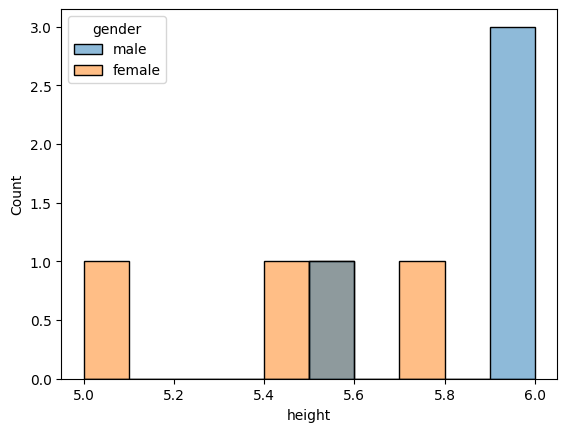

In [39]:
# prompt: gender을 hue로하여 'height컬럼의 histogram을 seaborn으로 시각화

import seaborn as sns

sns.histplot(data=df, x="height", hue="gender", bins=10)


<Axes: xlabel='height', ylabel='Density'>

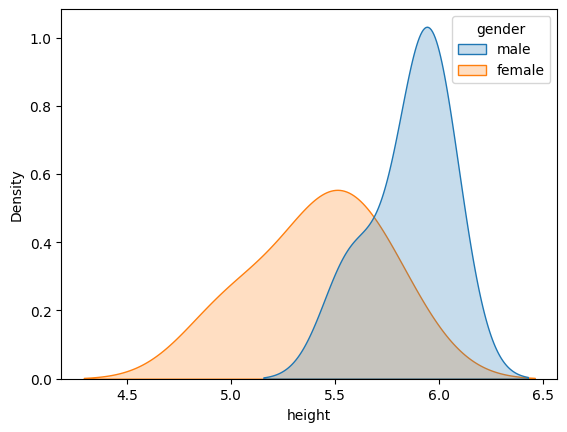

In [40]:
# prompt: 성별을 hue로하여 '키'컬럼의 histogram을 seaborn sns.kdeplot으로 시각화

sns.kdeplot(data=df, x="height", hue="gender", fill=True)


# **<font color='red'> 퀴즈1. 키가 6 feet인 사람의 성별은?**
## **1. 그 이유를 제1종오류와 제2종오류를 인용하여 설명하라**
## **2. 그 이유를 p-value를 인용하여 설명하라**

1. 키가 6 feet인 사람의 성별을 제1종 오류와 제2종 오류를 인용하여 설명하기
제1종 오류 (Type I Error)
제1종 오류는 귀무가설이 참인데도 불구하고 이를 기각하는 오류를 말합니다. 여기서 귀무가설을 "키가 6 feet인 사람의 성별은 남성이다"라고 설정하겠습니다. 이 경우 제1종 오류는 실제로 그 사람이 남성인데, 우리가 여성이라고 잘못 판단하는 경우입니다.

제2종 오류 (Type II Error)
제2종 오류는 귀무가설이 거짓인데도 불구하고 이를 기각하지 못하는 오류를 말합니다. 여기서 귀무가설을 "키가 6 feet인 사람의 성별은 남성이다"라고 설정했으므로, 제2종 오류는 실제로 그 사람이 여성인데, 우리가 남성이라고 잘못 판단하는 경우입니다.

그림을 통해 분석
남성의 키 분포가 5.5~6.2 feet에서 높게 나타나고, 특히 6 feet에서 최대 밀도를 가집니다.
여성의 키 분포는 주로 4.5~5.8 feet에서 높게 나타나며, 6 feet에서는 매우 낮은 밀도를 가집니다.
따라서, 키가 6 feet인 사람의 성별을 판단할 때, 남성일 확률이 높습니다. 그러나:

제1종 오류: 실제로 남성인데 여성으로 잘못 판단할 확률은 낮습니다.
제2종 오류: 실제로 여성인데 남성으로 잘못 판단할 확률은 매우 낮습니다.
2. 그 이유를 p-value를 인용하여 설명하기
p-value는 관찰된 데이터가 귀무가설 하에서 얻을 수 있는 값 이상으로 극단적인 결과를 얻을 확률을 나타냅니다.

여기서 귀무가설을 "키가 6 feet인 사람의 성별은 남성이다"로 설정했을 때:

p-value가 매우 낮으면, 우리가 관찰한 6 feet의 키가 남성일 확률이 매우 높습니다.
만약 p-value가 0.05 이하라면, 통계적으로 유의하게 남성일 가능성이 높다고 볼 수 있습니다.
그래프에서 6 feet 키의 분포를 보면 남성의 밀도가 매우 높고, 여성의 밀도는 거의 없기 때문에, p-value는 매우 낮을 것입니다. 이는 우리가 관찰한 6 feet의 키가 남성일 확률이 매우 높음을 의미합니다.

따라서, 키가 6 feet인 사람의 성별을 판단할 때, p-value를 고려하면 남성일 가능성이 매우 높습니다. 이는 제1종 오류와 제2종 오류 모두를 최소화하는 방향으로 판단할 수 있게 해줍니다.

### 혼동 행렬이란?
혼동 행렬은 분류 모델의 성능을 평가하기 위한 도구로, 실제 값과 예측 값을 비교하여 4가지 경우의 수를 나타냅니다:

- True Positive (TP): 실제 Positive이고 예측도 Positive인 경우
- True Negative (TN): 실제 Negative이고 예측도 Negative인 경우
- False Positive (FP): 실제는 Negative인데 예측이 Positive인 경우 (제1종 오류)
- False Negative (FN): 실제는 Positive인데 예측이 Negative인 경우 (제2종 오류)
여기서 "Positive"와 "Negative"는 특정 클래스를 나타내며, 이 예제에서는 남성을 Positive, 여성을 Negative로 가정하겠습니다.

예제 적용
가정
Positive (남성): 남성을 예측한 경우
Negative (여성): 여성을 예측한 경우

혼동 행렬

| 실제\예측       | 남성 (Positive) | 여성 (Negative) |
|-----------------|------------------|------------------|
| 남성 (Positive) | TP                | FN                |
| 여성 (Negative) | FP                | TN                |

- **TP (True Positive)**: 실제 남성이고 남성으로 예측된 경우
- **FN (False Negative)**: 실제 남성인데 여성으로 예측된 경우
- **FP (False Positive)**: 실제 여성인데 남성으로 예측된 경우
- **TN (True Negative)**: 실제 여성이고 여성으로 예측된 경우

혼동 행렬 예제
그래프와 p-value를 바탕으로, 키가 6 feet인 사람의 성별을 예측하는 모델을 만들면 다음

과 같은 혼동 행렬을 얻을 수 있습니다.

혼동 행렬 예제
가정: 남성은 Positive, 여성은 Negative로 예측하는 모델

실제 데이터
남성 4명 (키: 6, 5.92, 5.58, 5.92)
여성 4명 (키: 5, 5.5, 5.42, 5.75)
예측 기준
키가 6 feet이면 남성으로 예측, 그렇지 않으면 여성으로 예측

# 혼동 행렬 예제

| 실제\예측       | 남성 (Positive) | 여성 (Negative) |
|-----------------|------------------|------------------|
| 남성 (Positive) | 1                | 3                |
| 여성 (Negative) | 0                | 4                |

**설명:**
- **TP (True Positive)**: 실제 남성이고 남성으로 예측된 경우 (1명)
- **FN (False Negative)**: 실제 남성인데 여성으로 예측된 경우 (3명)
- **FP (False Positive)**: 실제 여성인데 남성으로 예측된 경우 (0명)
- **TN (True Negative)**: 실제 여성이고 여성으로 예측된 경우 (4명)

TP (True Positive): 실제 남성이고 남성으로 예측된 경우. 여기서는 6 feet인 남성이 1명.
FN (False Negative): 실제 남성인데 여성으로 예측된 경우. 여기서는 6 feet 미만의 남성 3명.
FP (False Positive): 실제는 여성인데 남성으로 예측된 경우. 여기서는 없음.
TN (True Negative): 실제 여성이고 여성으로 예측된 경우. 여기서는 4명.
제1종 오류와 제2종 오류
제1종 오류 (False Positive, FP): 실제로 여성인데 남성으로 예측한 경우. 이 경우는 0명 (그래프와 p-value를 고려하면 거의 없음).
제2종 오류 (False Negative, FN): 실제로 남성인데 여성으로 예측한 경우. 이 경우는 3명.
p-value와 혼동 행렬
p-value: 키가 6 feet인 경우 남성일 확률이 매우 높기 때문에, 남성으로 예측하는 것이 타당합니다. 이는 p-value가 매우 낮다는 것을 의미합니다.
혼동 행렬에서 보면, FN 값이 많지만 이는 6 feet 미만의 남성들을 여성으로 예측하는 경우입니다. 그러나 6 feet인 경우 남성으로 예측하는 것이 맞기 때문에 제1종 오류는 거의 발생하지 않습니다.
따라서, 혼동 행렬을 통해 키가 6 feet인 사람의 성별을 예측할 때 남성일 가능성이 높음을 확인할 수 있습니다. 제1종 오류의 확률이 매우 낮고, p-value가 낮기 때문에 통계적으로 남성일 가능성이 높다고 결론지을 수 있습니다.

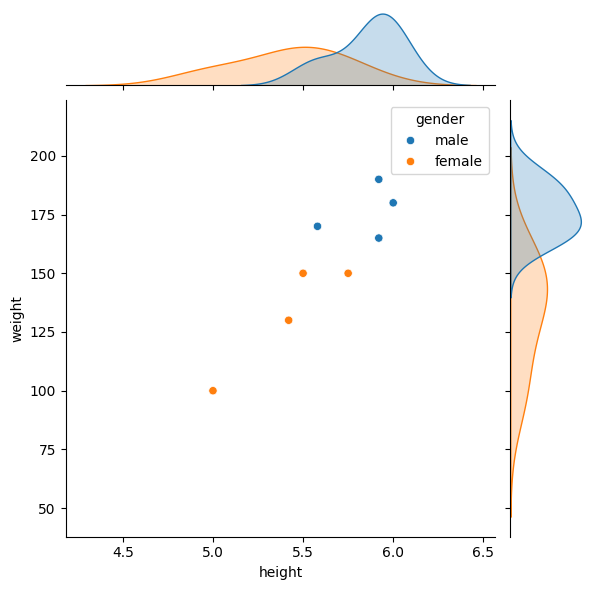

In [41]:
# prompt: gender을 hue로하여 'height', 'weight'컬럼으로 jointplot을 seaborn으로 시각화

import seaborn as sns

sns.jointplot(data=df, x="height", y="weight", hue="gender")


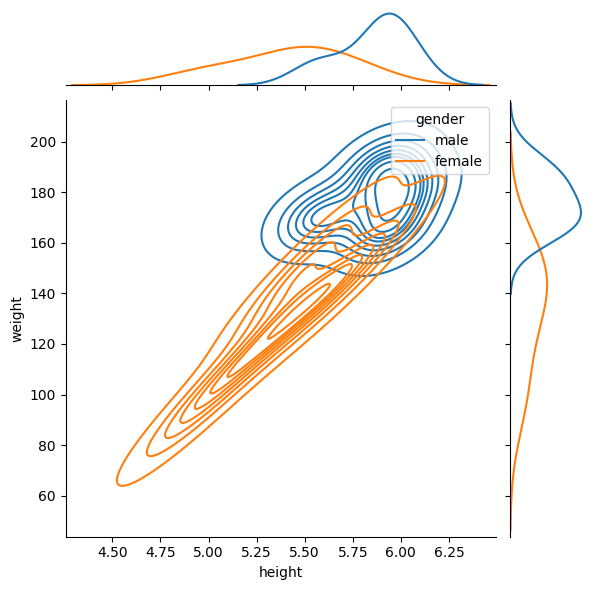

In [42]:
sns.jointplot(data=df, x="height", y="weight", hue="gender", kind="kde")

# **<font color='red'> 퀴즈2. 키가 6 feet이고 몸무게가 130인 사람의 성별은?**

### **키라는 변수를 기준으로 판단하였을 때, 키와 몸무게를 동시에 기준으로 판단했을떄 분류기준이 달라지는가?**

In [43]:
# prompt: df의 데이터를 바탕으로 유사한 유형으로 가상 데이터를 100개 만들어줘

import pandas as pd
import numpy as np

# Create a DataFrame with the original data
df = pd.DataFrame({
    'gender': ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female'],
    'height': [6, 5.92, 5.58, 5.92, 5, 5.5, 5.42, 5.75],
    'weight': [180, 190, 170, 165, 100, 150, 130, 150],
    'foot_size': [12, 11, 12, 10, 6, 8, 7, 9]
})

# Create a new DataFrame with 100 rows of synthetic data
synthetic_data = pd.DataFrame({
    'gender': np.random.choice(df['gender'].unique(), size=100),
    'height': np.random.choice(df['height'].unique(), size=100),
    'weight': np.random.choice(df['weight'].unique(), size=100),
    'foot_size': np.random.choice(df['foot_size'].unique(), size=100)
})

# Print the synthetic data
print(synthetic_data)


    gender  height  weight  foot_size
0   female    6.00     170          6
1     male    6.00     150         10
2     male    5.75     190          7
3   female    5.58     100          7
4     male    5.75     190         11
..     ...     ...     ...        ...
95  female    5.50     170         11
96  female    5.50     170          6
97    male    5.92     190          7
98    male    5.75     100         11
99  female    5.50     165          9

[100 rows x 4 columns]


In [44]:
synthetic_data

,gender,height,weight,foot_size
0,female,6.00,170,6
1,male,6.00,150,10
2,male,5.75,190,7
3,female,5.58,100,7
4,male,5.75,190,11
...,...,...,...,...
95,female,5.50,170,11
96,female,5.50,170,6
97,male,5.92,190,7
98,male,5.75,100,11


## **Generative AI?**
#### 8개의 데이터와 유사하게 가상의 데이터를 생성해서 시각화해보자

In [46]:
import pandas as pd
import numpy as np

# 주어진 데이터를 바탕으로 데이터프레임 생성
data = {
    "gender": ["male", "male", "male", "male", "female", "female", "female", "female"],
    "height": [6.00, 5.92, 5.58, 5.92, 5.00, 5.50, 5.42, 5.75],
    "weight": [180, 190, 170, 165, 100, 150, 130, 150],
    "foot_size": [12, 11, 12, 10, 6, 8, 7, 9]
}

# 데이터프레임으로 변환
df = pd.DataFrame(data)

# 남성과 여성의 평균과 표준편차 계산
mean_height_male = df[df['gender'] == 'male']['height'].mean()
std_height_male = df[df['gender'] == 'male']['height'].std()
mean_weight_male = df[df['gender'] == 'male']['weight'].mean()
std_weight_male = df[df['gender'] == 'male']['weight'].std()
mean_foot_size_male = df[df['gender'] == 'male']['foot_size'].mean()
std_foot_size_male = df[df['gender'] == 'male']['foot_size'].std()

mean_height_female = df[df['gender'] == 'female']['height'].mean()
std_height_female = df[df['gender'] == 'female']['height'].std()
mean_weight_female = df[df['gender'] == 'female']['weight'].mean()
std_weight_female = df[df['gender'] == 'female']['weight'].std()
mean_foot_size_female = df[df['gender'] == 'female']['foot_size'].mean()
std_foot_size_female = df[df['gender'] == 'female']['foot_size'].std()

# 가상의 데이터 100개 생성
np.random.seed(42)  # 재현성을 위해 랜덤 시드 고정

sample_size = 50

# 성별을 50:50 비율로 무작위 생성
gender = np.random.choice(['male', 'female'], sample_size)

# 키, 몸무게, 발크기를 남성과 여성의 평균 및 표준편차 기반으로 무작위 생성
height = np.where(gender == 'male', np.random.normal(mean_height_male, std_height_male, sample_size),
                  np.random.normal(mean_height_female, std_height_female, sample_size))
weight = np.where(gender == 'male', np.random.normal(mean_weight_male, std_weight_male, sample_size),
                  np.random.normal(mean_weight_female, std_weight_female, sample_size))
foot_size = np.where(gender == 'male', np.random.normal(mean_foot_size_male, std_foot_size_male, sample_size),
                     np.random.normal(mean_foot_size_female, std_foot_size_female, sample_size))

# 데이터프레임 생성
df_generative = pd.DataFrame({
    'gender': gender,
    'height': height,
    'weight': weight,
    'foot_size': foot_size
})

df_generative


,gender,height,weight,foot_size
0,male,5.737180,184.756850,10.146503
1,female,5.130514,154.723989,6.898829
2,male,6.334064,167.654020,11.407997
3,male,5.928789,184.821642,10.430510
4,male,5.877876,167.360312,11.212051
5,female,5.742559,114.263532,8.674467
6,male,5.742649,191.829201,9.537645
7,male,6.032334,191.686408,11.592093
8,male,5.909473,166.486530,10.853116
9,female,4.951328,145.211499,7.662788


<Axes: xlabel='height', ylabel='Density'>

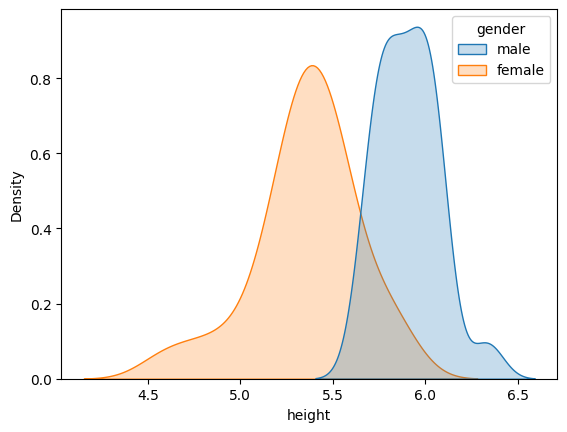

In [47]:

sns.kdeplot(data=df_generative, x="height", hue="gender", fill=True)

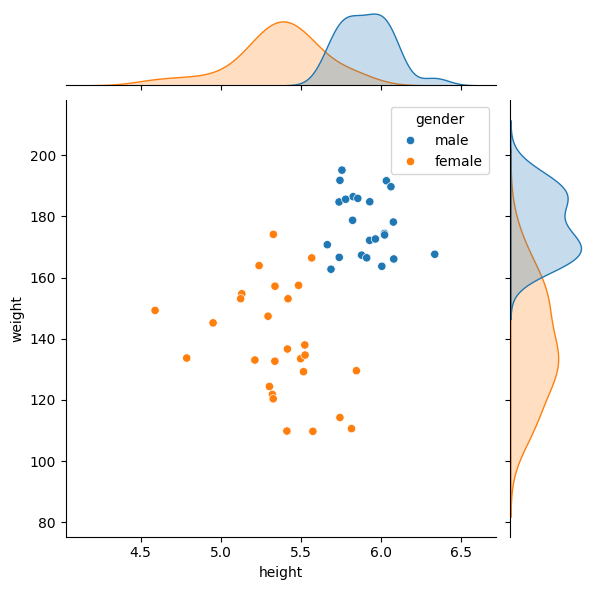

In [48]:
sns.jointplot(data=df_generative, x="height", y="weight", hue="gender")

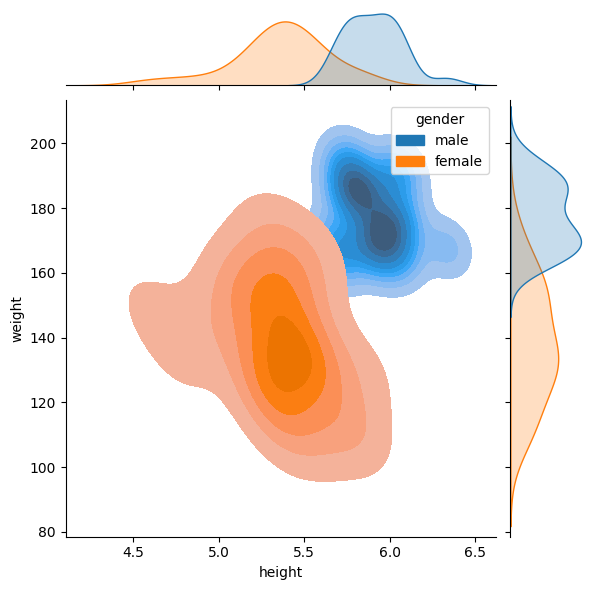

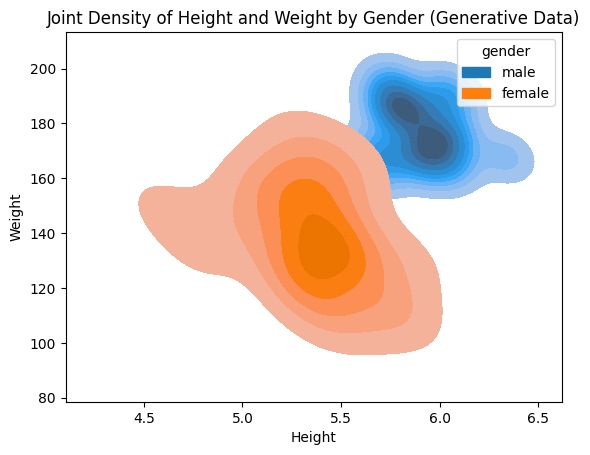

In [49]:
# prompt: sns.jointplot(data=df_generative, x="height", y="weight", hue="gender") 대신에 등고선으로 그려줘

import seaborn as sns
import matplotlib.pyplot as plt

# Create a jointplot with bivariate and marginal histograms
sns.jointplot(data=df_generative, x="height", y="weight", hue="gender", kind="kde", fill=True)

# Convert the jointplot to a figure and axes object
fig, ax = plt.subplots()

# Plot the joint density as a contour plot
sns.kdeplot(data=df_generative, x="height", y="weight", hue="gender", fill=True, ax=ax)

# Add labels and title
ax.set_xlabel("Height")
ax.set_ylabel("Weight")
ax.set_title("Joint Density of Height and Weight by Gender (Generative Data)")

# Show the plot
plt.show()
